<a href="https://colab.research.google.com/github/MoreenMarutaData/WEEK-6-CORE-IP-ON-REGRESSION/blob/main/FOOTBALL_ANALYSIS_CORE_WEEK_6_MOREEN_MUGAMBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A FOOTBALL ANALYSIS FOR MCHEZO PESA COMPANY**

## DEFINING THE QUESTION

My research and analysis problem is coming up and figuring out which models would work best to predict future football matches and what conitions favour the specific findings.

## METRIC FOR SUCCESS

Using polynomial and logistic approach to predict various factors.

##EXPERIMENTAL DESIGN TAKEN



1.   Polynomial approach

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.


2.   Logistic approach

Figuring out from the home team’s perspective if the game is a Win, Lose or Draw 



##APPROPRIATENESS OF THE DATA

Data to be used contains information on football matches since 1872 to 2019.  The data is extracted from the Moringa Website. The data files include:

Fifa rankings dataset and Results of football matches across the world: https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

This data is relevant in this project since it provides important insights that will help in solving the research question by creating appropriate models.

## **READING AND CHECKING THE DATA**

### IMPORT LIBRARIES

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import requests

### LOAD, READ AND CLEAN DATA SETS

#### FIFA RANKING DATASET

##### PREVIEW DATASET

In [2]:
url ="https://drive.google.com/file/d/1Zv4PwDdS1TI81NV7nYgwhYK_3m5UjlWC/view?usp=sharing"
url2 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
ranking = pd.read_csv(url2)
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
ranking.shape

(57793, 16)

In [5]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [6]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

##### CLEANING

rename column

In [7]:
ranking.rename(columns= {'country_full':'country'}, inplace=True)
ranking.head(1)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


check for missing values duplicates and outliers

In [8]:
ranking.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
print(ranking.duplicated().sum())
ranking.drop_duplicates(inplace=True)
print(ranking.duplicated().sum())

37
0


drop unnecessary columns

In [10]:
ranking = ranking.drop(columns=['country_abrv','total_points','rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'], axis=1, inplace=False)
ranking

,rank,country,previous_points,confederation,rank_date
0,1,Germany,57,UEFA,1993-08-08
1,2,Italy,57,UEFA,1993-08-08
2,3,Switzerland,50,UEFA,1993-08-08
3,4,Sweden,55,UEFA,1993-08-08
4,5,Argentina,51,CONMEBOL,1993-08-08
...,...,...,...,...,...
57788,206,Anguilla,0,CONCACAF,2018-06-07
57789,206,Bahamas,0,CONCACAF,2018-06-07
57790,206,Eritrea,0,CAF,2018-06-07
57791,206,Somalia,0,CAF,2018-06-07


anomalies

In [11]:
column = ranking.columns.to_list()

for column in column:
    print("\n")
    print("Column Name:", column)
    print(ranking[column].unique())



Column Name: rank
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]


Column Name: country
['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Den

##### EDA

univariate

Text(0.5, 1.0, 'most popular confederations')

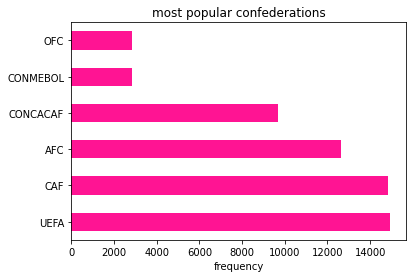

In [12]:
import matplotlib.colors as mcolors

a = ranking['confederation'].value_counts()
a.plot.barh(color='deeppink')
plt.xlabel('frequency')
plt.title('most popular confederations')

UEFA is the most frequent popular confederation

##### FEATURE ENGINEERING

lets convert rank date column to date time then split it 

In [13]:
ranking['rank_date']=pd.to_datetime(ranking['rank_date'])

In [14]:
ranking['day'] = ranking['rank_date'].dt.day
ranking['month']=ranking['rank_date'].dt.month
ranking['year']=ranking['rank_date'].dt.year

ranking

,rank,country,previous_points,confederation,rank_date,day,month,year
0,1,Germany,57,UEFA,1993-08-08,8,8,1993
1,2,Italy,57,UEFA,1993-08-08,8,8,1993
2,3,Switzerland,50,UEFA,1993-08-08,8,8,1993
3,4,Sweden,55,UEFA,1993-08-08,8,8,1993
4,5,Argentina,51,CONMEBOL,1993-08-08,8,8,1993
...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0,CONCACAF,2018-06-07,7,6,2018
57789,206,Bahamas,0,CONCACAF,2018-06-07,7,6,2018
57790,206,Eritrea,0,CAF,2018-06-07,7,6,2018
57791,206,Somalia,0,CAF,2018-06-07,7,6,2018


In [15]:
ranking['country_rank']= ranking['country']


In [16]:
ranking.head(1)

,rank,country,previous_points,confederation,rank_date,day,month,year,country_rank
0,1,Germany,57,UEFA,1993-08-08,8,8,1993,Germany


#### RESULTS DATASET

##### PREVIEW DATASET

In [17]:
url1 = "https://drive.google.com/file/d/1htuUTMvOzbwoKJB79ahvHyZ8B1eIwrTd/view?usp=sharing"
url3 = 'https://drive.google.com/uc?id=' + url1.split('/')[-2]
results = pd.read_csv(url3)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [18]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [19]:
results.shape

(40839, 9)

In [20]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [21]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

##### CLEANING

to create our models we do not need the city and neutral columns so i'm going to drop them

In [22]:
results = results.drop(columns=['city','neutral'], axis=1,inplace=False)
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland


anomalies

In [23]:
column = results.columns.to_list()

for column in column:
    print("\n")
    print("Column Name:", column)
    print(results[column].unique())



Column Name: date
['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']


Column Name: home_team
['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts an

outliers


In [24]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country'],
      dtype='object')

checking for outliers, missing values and duplicates

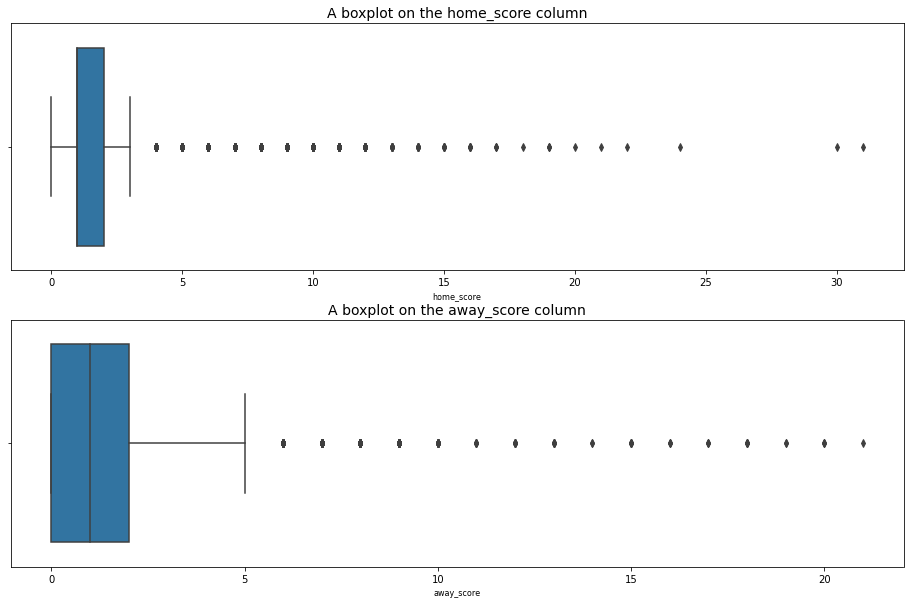

In [25]:
col_names = ['home_score', 'away_score']
fig, ax = plt.subplots(len(col_names), figsize = (16,10))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = results[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [26]:
# removing outliers
def mod_outlier(results):
        data1 = results.copy()
        results = results._get_numeric_data()


        q1 = results.quantile(0.25)
        q3 = results.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in results.columns:
            for i in range(0,len(results[col])):
                if results[col][i] < lower_bound[col]:            
                    results[col][i] = lower_bound[col]

                if results[col][i] > upper_bound[col]:            
                    results[col][i] = upper_bound[col]    


        for col in results.columns:
            data1[col] = results[col]

        return(data1)

we are removing the outliers because they will distort our analysis and results

In [27]:
results=mod_outlier(results)

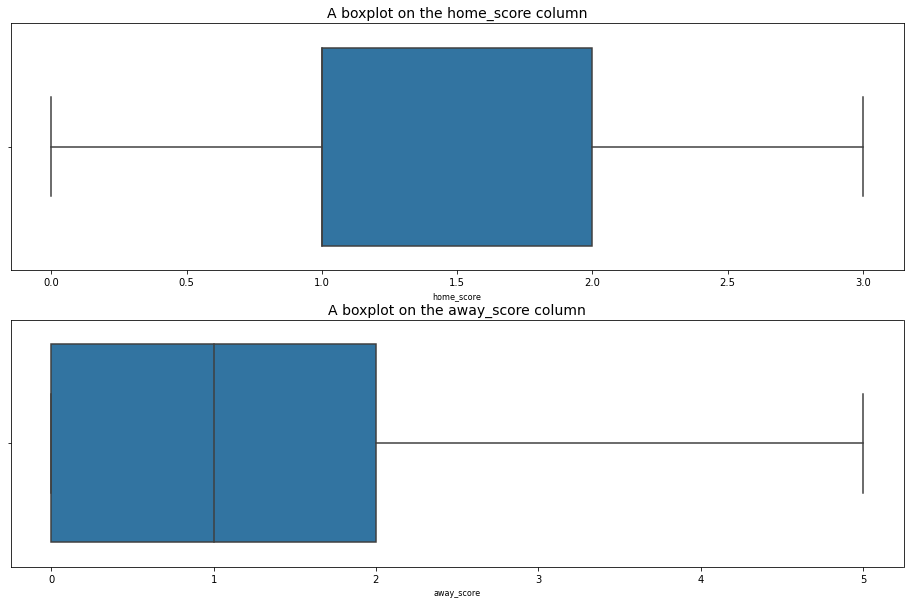

In [28]:
col_names = ['home_score', 'away_score']
fig, ax = plt.subplots(len(col_names), figsize = (16,10))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = results[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [29]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

In [30]:
print(results.duplicated().sum())
results.drop_duplicates(inplace=True)
print(results.duplicated().sum())

1
0


In [31]:
results.shape

(40838, 7)

##### FEATURE ENGINEERING

lets convert date column to datetime

In [32]:
results['date']=pd.to_datetime(results['date'])

lets split date column to date month and year to be able to understand our dataset further

In [33]:
results['day'] = results['date'].dt.day
results['month']=results['date'].dt.month
results['year']=results['date'].dt.year

results

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30,11,1872
1,1873-03-08,England,Scotland,3,2,Friendly,England,8,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,7,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,England,6,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,4,3,1876
...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,3,1,Pacific Games,Samoa,18,7,2019
40835,2019-07-18,Fiji,Solomon Islands,3,4,Pacific Games,Samoa,18,7,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,19,7,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,19,7,2019


locking the dates to match with the dates in the ranking dataset

In [34]:
results= results.loc[(results['date']>='1993-08-07')&(results['date']<'2018-06-08')]
results

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,7,8,1993
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,8,8,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,8,1993
17917,1993-08-08,Ecuador,Venezuela,3,0,FIFA World Cup qualification,Ecuador,8,8,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,8,8,1993
...,...,...,...,...,...,...,...,...,...,...
39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,England,7,6,2018
39830,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,England,7,6,2018
39831,2018-06-07,Cascadia,Western Armenia,3,0,CONIFA World Football Cup,England,7,6,2018
39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,England,7,6,2018


In [35]:
results['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [36]:
results = results.reset_index()
results

,index,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
0,17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,7,8,1993
1,17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,8,8,1993
2,17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,8,1993
3,17917,1993-08-08,Ecuador,Venezuela,3,0,FIFA World Cup qualification,Ecuador,8,8,1993
4,17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,8,8,1993
...,...,...,...,...,...,...,...,...,...,...,...
21914,39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,England,7,6,2018
21915,39830,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,England,7,6,2018
21916,39831,2018-06-07,Cascadia,Western Armenia,3,0,CONIFA World Football Cup,England,7,6,2018
21917,39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,England,7,6,2018


In [37]:
results.columns
results = results.drop(columns=['index'], inplace=False)
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
0,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,7,8,1993
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,8,8,1993
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,8,1993


lets fix the tournament column

In [38]:

def tournament(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup qualification':
        return 'World cup'
    elif typ == 'FIFA World Cup': 
        return 'World cup'
    else:
        return 'Other'
      
results['tournament'] = results.tournament.apply(lambda q: tournament(q))

results.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
17620,2013-10-11,France,Australia,3,0,Friendly,France,11,10,2013
496,1994-07-08,Vanuatu,Fiji,2,4,Other,Solomon Islands,8,7,1994
4113,1999-06-09,Wales,Denmark,0,2,Other,England,9,6,1999
2792,1997-08-06,Estonia,Faroe Islands,0,2,Friendly,Estonia,6,8,1997
6595,2002-01-18,Haiti,Canada,0,2,Other,United States,18,1,2002


lets add another column for home status

In [39]:

# def status(row):
#     if row['home_score'] == row['away_score']:
#         value = 'Draw'
#     elif row['home_score'] < row['away_score']:
#         value = 'Loss'
#     else:
#         value = 'Win'
#     return value

# results['home_status'] = results.apply(status, axis=1)
# results.head(3)

In [40]:
results.shape

(21919, 10)

In [41]:
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
0,1993-08-07,Senegal,Zambia,0,0,World cup,Ivory Coast,7,8,1993
1,1993-08-08,Bolivia,Uruguay,3,1,World cup,Bolivia,8,8,1993
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,8,1993


##### EDA

univariate

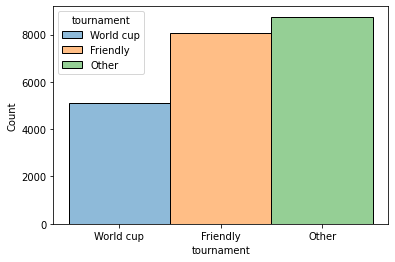

In [42]:

sns.histplot(x='tournament', data=results, hue='tournament')

world cup has the lowest counts followed by friendly tournaments then the others

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


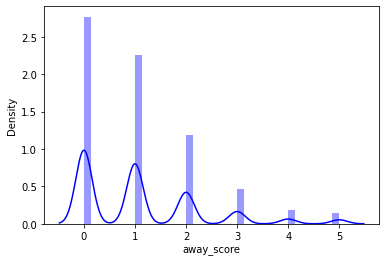

In [43]:
sns.distplot(results['away_score'], color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


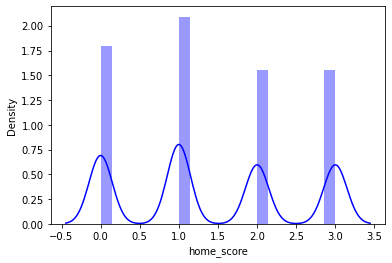

In [44]:
sns.distplot(results['home_score'], color='blue')

bivariate

#### MERGING, CHECKING AND CLEANING DATA, FEATURE ENGINEERING

merging on home team

In [45]:

df1 = pd.merge(ranking,results, how='inner', left_on=['country_rank','year','month'], right_on = ['home_team','year', 'month'] )

df1.tail()

,rank,country_x,previous_points,confederation,rank_date,day_x,month,year,country_rank,date,home_team,away_team,home_score,away_score,tournament,country_y,day_y
18518,139,Botswana,195,CAF,2018-06-07,7,6,2018,Botswana,2018-06-01,Botswana,Mauritius,3,0,Other,South Africa,1
18519,147,Lesotho,172,CAF,2018-06-07,7,6,2018,Lesotho,2018-06-02,Lesotho,Eswatini,1,0,Other,South Africa,2
18520,147,Lesotho,172,CAF,2018-06-07,7,6,2018,Lesotho,2018-06-06,Lesotho,Zimbabwe,0,0,Other,South Africa,6
18521,160,Barbados,129,CONCACAF,2018-06-07,7,6,2018,Barbados,2018-06-03,Barbados,Belize,0,0,Friendly,Barbados,3
18522,184,Malta,62,UEFA,2018-06-07,7,6,2018,Malta,2018-06-01,Malta,Georgia,0,1,Friendly,Austria,1


In [46]:
df1.rename(columns={'rank':'home_rank'}, inplace=True)
df1.head(1)

,home_rank,country_x,previous_points,confederation,rank_date,day_x,month,year,country_rank,date,home_team,away_team,home_score,away_score,tournament,country_y,day_y
0,4,Sweden,55,UEFA,1993-08-08,8,8,1993,Sweden,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,11


In [47]:
df1.columns

Index(['home_rank', 'country_x', 'previous_points', 'confederation',
       'rank_date', 'day_x', 'month', 'year', 'country_rank', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country_y', 'day_y'],
      dtype='object')

In [48]:
df1=df1.drop(columns=[ 'country_x', 'previous_points', 'confederation',
       'rank_date', 'day_x', 'month', 'country_rank', 'date',
         'away_score', 'tournament',
       'country_y', 'day_y'])
df1.head(1)

,home_rank,year,home_team,away_team,home_score
0,4,1993,Sweden,Switzerland,1


merging on away team

In [49]:
df2= pd.merge(ranking,results, how='inner', left_on=['country_rank','year','month'], right_on = ['away_team','year', 'month'] )
df2.head()

,rank,country_x,previous_points,confederation,rank_date,day_x,month,year,country_rank,date,home_team,away_team,home_score,away_score,tournament,country_y,day_y
0,3,Switzerland,50,UEFA,1993-08-08,8,8,1993,Switzerland,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,11
1,5,Argentina,51,CONMEBOL,1993-08-08,8,8,1993,Argentina,1993-08-08,Paraguay,Argentina,1,3,World cup,Paraguay,8
2,5,Argentina,51,CONMEBOL,1993-08-08,8,8,1993,Argentina,1993-08-15,Colombia,Argentina,2,1,World cup,Colombia,15
3,8,Brazil,55,CONMEBOL,1993-08-08,8,8,1993,Brazil,1993-08-15,Uruguay,Brazil,1,1,World cup,Uruguay,15
4,9,Norway,49,UEFA,1993-08-08,8,8,1993,Norway,1993-08-11,Faroe Islands,Norway,0,5,Friendly,Faroe Islands,11


In [50]:
df2.rename(columns={'rank':'away_rank'}, inplace=True)
df2.head(1)

,away_rank,country_x,previous_points,confederation,rank_date,day_x,month,year,country_rank,date,home_team,away_team,home_score,away_score,tournament,country_y,day_y
0,3,Switzerland,50,UEFA,1993-08-08,8,8,1993,Switzerland,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,11


In [51]:
df2.columns

Index(['away_rank', 'country_x', 'previous_points', 'confederation',
       'rank_date', 'day_x', 'month', 'year', 'country_rank', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country_y', 'day_y'],
      dtype='object')

In [52]:
df2=df2.drop(columns=[ 'country_x', 'previous_points', 'confederation',
       'rank_date', 'day_x', 'month', 'country_rank', 'date',
       'home_team', 'home_score',
       'country_y', 'day_y'])
df2.head(1)


,away_rank,year,away_team,away_score,tournament
0,3,1993,Switzerland,2,Friendly


merging df1 and df2

In [53]:
df = pd.merge(df1, df2, how = 'inner', left_on = ['year', 'away_team'], right_on = ['year', 'away_team'])

df.head(3)

,home_rank,year,home_team,away_team,home_score,away_rank,away_score,tournament
0,4,1993,Sweden,Switzerland,1,3,2,Friendly
1,4,1993,Sweden,Switzerland,1,10,1,World cup
2,4,1993,Sweden,Switzerland,1,13,0,World cup


In [54]:
def status(row):
    if row['home_score'] == row['away_score']:
        value = 'Draw'
    elif row['home_score'] < row['away_score']:
        value = 'Loss'
    else:
        value = 'Win'
    return value

df['home_status'] = df.apply(status, axis=1)
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,country,day,month,year
0,1993-08-07,Senegal,Zambia,0,0,World cup,Ivory Coast,7,8,1993
1,1993-08-08,Bolivia,Uruguay,3,1,World cup,Bolivia,8,8,1993
2,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,8,1993


convert data types

In [55]:

df['away_team']=df['away_team'].astype('category')
df['home_team']=df['home_team'].astype('category')
df['home_status']=df['home_status'].astype('category')



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99617 entries, 0 to 99616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   home_rank    99617 non-null  int64   
 1   year         99617 non-null  int64   
 2   home_team    99617 non-null  category
 3   away_team    99617 non-null  category
 4   home_score   99617 non-null  int64   
 5   away_rank    99617 non-null  int64   
 6   away_score   99617 non-null  int64   
 7   tournament   99617 non-null  object  
 8   home_status  99617 non-null  category
dtypes: category(3), int64(5), object(1)
memory usage: 5.8+ MB


In [57]:
df.describe()

,home_rank,year,home_score,away_rank,away_score
count,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000
mean,74.068031,2006.467019,1.333808,72.587721,1.081442
std,49.442183,6.548083,1.071924,48.123568,1.167921
min,1.000000,1993.000000,0.000000,1.000000,0.000000
25%,33.000000,2001.000000,0.000000,33.000000,0.000000
50%,68.000000,2007.000000,1.000000,67.000000,1.000000
75%,108.000000,2012.000000,2.000000,105.000000,2.000000
max,209.000000,2018.000000,3.000000,209.000000,5.000000


In [58]:
df.isnull().sum()

home_rank      0
year           0
home_team      0
away_team      0
home_score     0
away_rank      0
away_score     0
tournament     0
home_status    0
dtype: int64

since its possible to have had repeat matches, there is no need to remove the duplicated values

In [59]:
print(df.duplicated().sum())
#df.drop_duplicates(keep=False,inplace=True)
#print(df.duplicated().sum())

11193


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99617 entries, 0 to 99616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   home_rank    99617 non-null  int64   
 1   year         99617 non-null  int64   
 2   home_team    99617 non-null  category
 3   away_team    99617 non-null  category
 4   home_score   99617 non-null  int64   
 5   away_rank    99617 non-null  int64   
 6   away_score   99617 non-null  int64   
 7   tournament   99617 non-null  object  
 8   home_status  99617 non-null  category
dtypes: category(3), int64(5), object(1)
memory usage: 5.8+ MB


In [61]:
df.head()

,home_rank,year,home_team,away_team,home_score,away_rank,away_score,tournament,home_status
0,4,1993,Sweden,Switzerland,1,3,2,Friendly,Loss
1,4,1993,Sweden,Switzerland,1,10,1,World cup,Draw
2,4,1993,Sweden,Switzerland,1,13,0,World cup,Win
3,28,1993,Scotland,Switzerland,1,3,2,Friendly,Loss
4,28,1993,Scotland,Switzerland,1,10,1,World cup,Draw


#####EDA


In [62]:
a=df[['home_score','away_score']]


In [63]:
a.var()

home_score    1.149021
away_score    1.364041
dtype: float64

In [64]:
a.std()

home_score    1.071924
away_score    1.167921
dtype: float64

In [65]:
a.skew()

home_score    0.238385
away_score    1.200157
dtype: float64

In [66]:
a.kurtosis()

home_score   -1.194945
away_score    1.258360
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


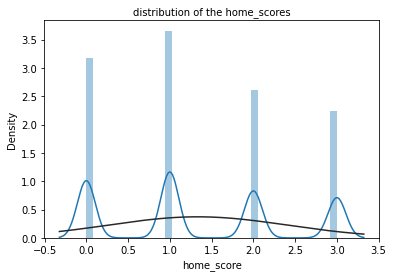

In [67]:
#distribution of the home_scores
from scipy.stats import norm
sns.distplot(df['home_score'], fit=norm)
plt.title('distribution of the home_scores', fontsize = 10)
plt.show()

over the years

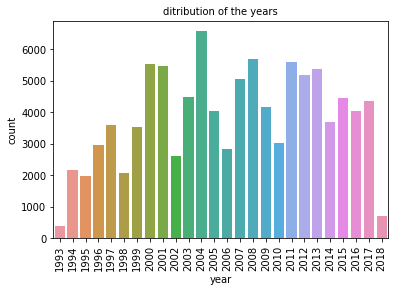

In [68]:
y=sns.countplot(x='year', data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

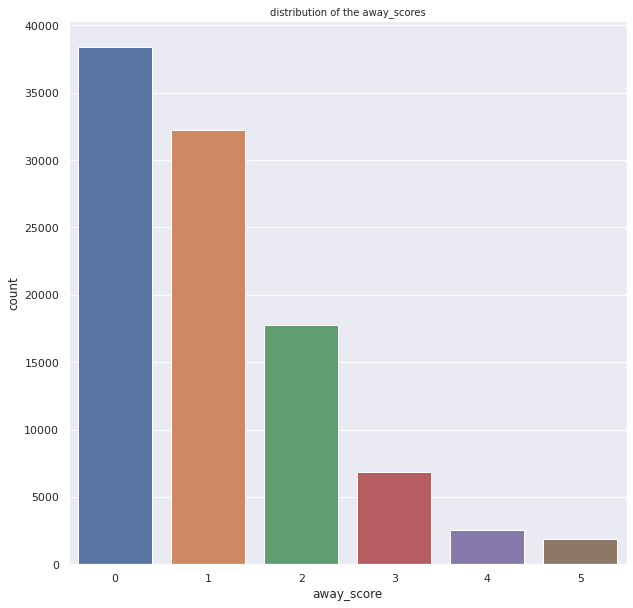

In [69]:

#distribution of the away_scores
sns.countplot(x='away_score', data=df)
plt.title('distribution of the away_scores', fontsize = 10)
plt.show()

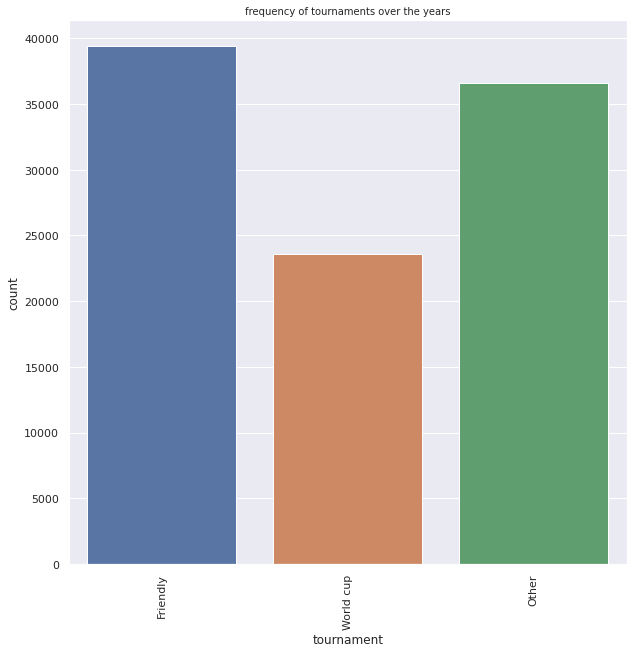

In [70]:
y=sns.countplot(x='tournament', data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('frequency of tournaments over the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

#####MULTICOLLINEARITY

In [71]:
df.corr()

,home_rank,year,home_score,away_rank,away_score
home_rank,1.000000,0.118441,-0.206087,0.457446,-0.001682
year,0.118441,1.000000,-0.027484,0.143335,-0.012336
home_score,-0.206087,-0.027484,1.000000,0.227655,-0.069674
away_rank,0.457446,0.143335,0.227655,1.000000,-0.169055
away_score,-0.001682,-0.012336,-0.069674,-0.169055,1.000000


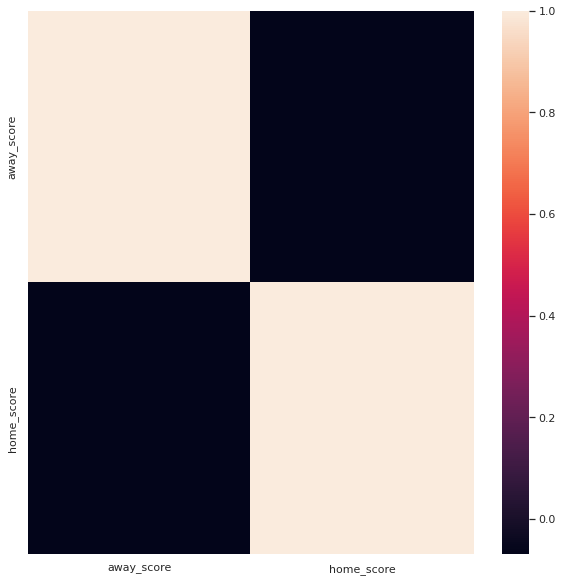

In [72]:
correlations =sns.heatmap(df[['away_score','home_score']].corr())

the independent values, home score and away score are not correlated

###MODELS

encode categorical columns

In [73]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dfe = df.apply(label.fit_transform)
dfe

,home_rank,year,home_team,away_team,home_score,away_rank,away_score,tournament,home_status
0,3,0,167,168,1,2,2,0,1
1,3,0,167,168,1,9,1,2,0
2,3,0,167,168,1,12,0,2,2
3,27,0,151,168,1,2,2,0,1
4,27,0,151,168,1,9,1,2,0
...,...,...,...,...,...,...,...,...,...
99612,183,25,112,69,0,95,0,0,0
99613,96,25,85,40,3,122,0,1,2
99614,116,25,93,13,3,104,0,0,2
99615,121,25,173,39,0,74,2,0,1


In [74]:
dfe.columns

Index(['home_rank', 'year', 'home_team', 'away_team', 'home_score',
       'away_rank', 'away_score', 'tournament', 'home_status'],
      dtype='object')

#####LOGISTIC APPROACH

split our data set

In [75]:
X1 = dfe[[ 'away_score', 'home_score',
        'tournament']].values
y = dfe[ 'home_status'].values

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = .2, random_state=0)

fit the model

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X1_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

make a prediction. test the accuracy of the model

In [77]:
y_predicted=lr.predict(X1_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
print(cm)

df3=pd.DataFrame({'Actual':y_test,'Predicted':y_predicted})
print(df3)

[[4959    0    0]
 [   0 5958    0]
 [   0    0 9007]]
       Actual  Predicted
0           2          2
1           0          0
2           2          2
3           1          1
4           2          2
...       ...        ...
19919       1          1
19920       0          0
19921       2          2
19922       2          2
19923       0          0

[19924 rows x 2 columns]


In [78]:
#sklearn.metrics.log_loss(y_test, y_predicted, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)
from sklearn.metrics import log_loss
log_loss([0, 1, 2],[[4959,  0,  0],[ 0, 5958,  0], [ 0,  0, 9007]])

2.1094237467877998e-15

our value diverges far from the true value. My recommendation would be maybe use a different model.

lets increase our test size and observe what happens

In [79]:
X = dfe[[ 'away_score', 'home_score',
        'tournament']].values
y1 = dfe[ 'home_status'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = .4, random_state=0)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y1_train)


y1_predicted=logreg.predict(X_test)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y1_test, y1_predicted)
print(cm)

df4=pd.DataFrame({'Actual':y1_test,'Predicted':y1_predicted})
print(df4)

[[4959    0    0]
 [   0 5958    0]
 [   0    0 9007]]
       Actual  Predicted
0           2          2
1           0          0
2           2          2
3           1          1
4           2          2
...       ...        ...
39842       0          0
39843       2          2
39844       1          1
39845       0          0
39846       1          1

[39847 rows x 2 columns]


no difference

using k nearest

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X1_train,y_train)
accuracy= knn.score(X1_test,y_test)
print(accuracy)



1.0


In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-Squared:', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared: 1.0


the model is perfect, a bit too perfect and overfitted. the values used: tournament,home score and away score do not majorly affect the prediction of the model. Other factors should be put in place.

#####POLYNOMIAL APPROACH

###### HOW MANY GOALS THE HOME TEAM SCORES

In [82]:
dfe.head()

,home_rank,year,home_team,away_team,home_score,away_rank,away_score,tournament,home_status
0,3,0,167,168,1,2,2,0,1
1,3,0,167,168,1,9,1,2,0
2,3,0,167,168,1,12,0,2,2
3,27,0,151,168,1,2,2,0,1
4,27,0,151,168,1,9,1,2,0


In [83]:
df2=pd.DataFrame()
df2['tournament'],df2['home_score']=dfe['tournament'], dfe['home_score']
df2.tail()

,tournament,home_score
99612,0,0
99613,1,3
99614,0,3
99615,0,0
99616,0,0


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df2['home_score'], df2['tournament'])
print(X_train)
print(X_test)
print(y_train)
print(y_test)

X_train_df, X_test_df =pd.DataFrame(X_train), pd.DataFrame(X_test)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)


34517    0
93652    2
5812     1
84115    1
78279    1
        ..
63693    1
66840    0
94612    1
82846    1
63391    1
Name: home_score, Length: 74712, dtype: int64
12769    0
63685    0
26178    1
67095    2
31087    0
        ..
22238    0
41189    2
1110     0
29220    1
13325    0
Name: home_score, Length: 24905, dtype: int64
34517    0
93652    1
5812     0
84115    0
78279    0
        ..
63693    0
66840    2
94612    2
82846    1
63391    0
Name: tournament, Length: 74712, dtype: int64
12769    1
63685    0
26178    1
67095    2
31087    0
        ..
22238    2
41189    2
1110     2
29220    0
13325    1
Name: tournament, Length: 24905, dtype: int64


In [85]:
from sklearn import linear_model

model=linear_model.LinearRegression()
model=model.fit(X_train_poly, y_train)
co = model.coef_
intercept=model.intercept_

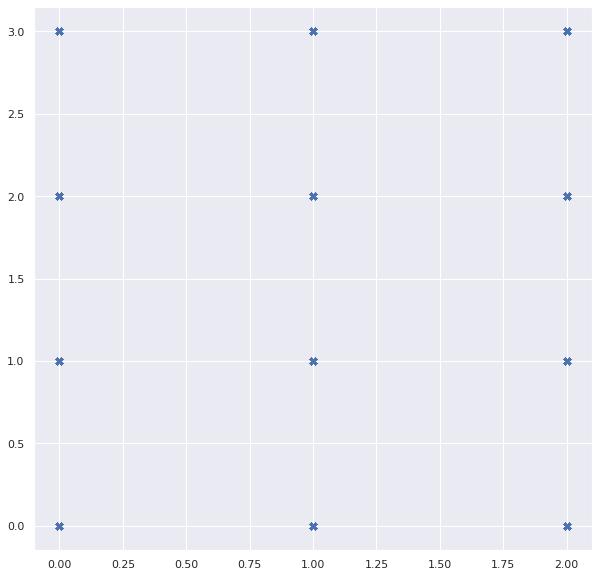

In [86]:
x_axis=np.arange(0,10,0.01)
#response=intercept+co(1)*x_axis + co(2)*x_axis**2
plt.scatter(df2['tournament'], df2['home_score'], color='b',marker='x')
plt.show()

In [87]:
from sklearn.metrics import r2_score

prediction=model.predict(X_test_poly)
r2_score(prediction, y_test)


-780.9447924208275

Not a good model. Lets try another one

In [114]:
cor=df.corr()
pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)

,home_rank,year,home_score,away_rank,away_score
home_rank,1.462539,-0.048778,0.472199,-0.786131,-0.098141
year,-0.048778,1.026697,0.048897,-0.137197,-0.007204
home_score,0.472199,0.048897,1.212307,-0.498741,0.001549
away_rank,-0.786131,-0.137197,-0.498741,1.530166,0.220918
away_score,-0.098141,-0.007204,0.001549,0.220918,1.037201


In [115]:
x=dfe[['home_rank','away_rank']].values
y=dfe['home_score'].values

print(x.shape)
print(y.shape)

(99617, 2)
(99617,)


In [116]:
dfe['tournament'].unique()

array([0, 2, 1])

In [119]:
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

pol_reg.predict(poly_reg.fit_transform([[70,2]]))

array([0.66853453])

In [125]:
#Grid Search
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# y_train.reshape(1,-1)
# regressor = LinearRegression()
# regressor.fit(x_train, y_train)
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# alpha = [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
# parameters = dict(alpha = alpha)
# grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

In [130]:
X2=dfe[['home_rank','away_rank','tournament']]
y2=dfe['away_score']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

# This is our prediction for admission based on our model
y2_predict = regressor.predict(X2_test)

# We now create the residual by substracting the test value from the predicted value 
residuals = np.subtract(y2_predict, y2_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.005251397372816953

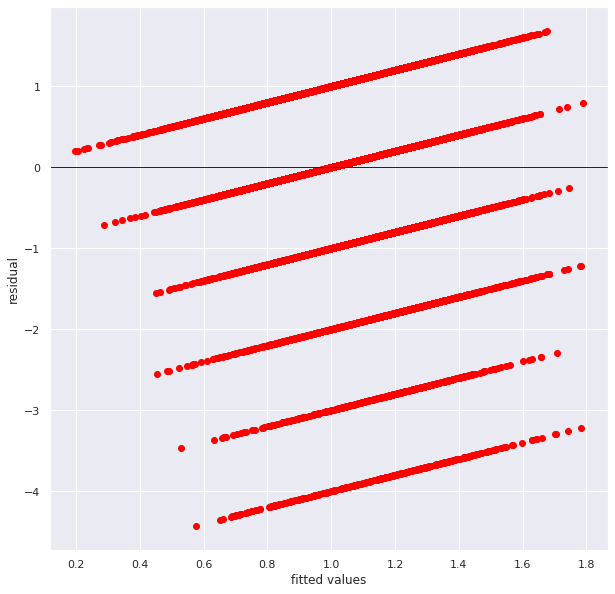

In [134]:
# Residual plots
plt.scatter(y2_predict, residuals, color='red')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='maroon', linewidth=1)
plt.show()

In [136]:
# Perform a bartlett test of variance 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predicted, residuals)

# Compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predicted)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are not equal and the model should be reassessed')
else:
  print('the variances are homogeneous')

inf
the variances are homogeneous


#####RECOMMENDATION

More categorisation on the tournament column




